In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read city data
city_data = pd.read_csv(city_data_to_load)

# Read ride data
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview

combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

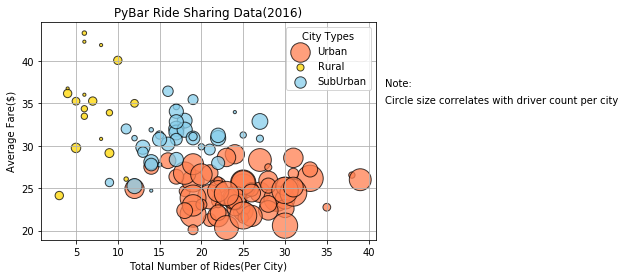

In [22]:
# Obtain the x and y coordinates for each of the three city types

# Group by type Urban
type1 = combined_data[combined_data['type']=='Urban'].groupby(['city'])

rides_per_city1 = type1['ride_id'].count()

average_fare1 = type1['fare'].mean()

driver_count1 = type1['driver_count'].mean()

# Group by type Rural
type2 = combined_data[combined_data['type']=='Rural'].groupby(['city'])

rides_per_city2 = type2['ride_id'].count()

average_fare2 = type2['fare'].mean()

driver_count2 = type2['driver_count'].mean()

# Group by type SubUrban
type3 = combined_data[combined_data['type']=='Suburban'].groupby(['city'])

rides_per_city3 = type3['ride_id'].count()

average_fare3 = type3['fare'].mean()

driver_count3 = type3['driver_count'].mean()

# Build the scatter plots for each city types

plt.scatter(rides_per_city1,average_fare1,marker="o", facecolors="Coral", edgecolors="black",
            s=driver_count1*10, alpha=0.75,label='Urban')
plt.scatter(rides_per_city2,average_fare2,marker="o", facecolors="Gold", edgecolors="black",
            s=driver_count2*10, alpha=0.75,label='Rural')
plt.scatter(rides_per_city3,average_fare3,marker="o", facecolors="SkyBlue", edgecolors="black",
            s=driver_count3*10, alpha=0.75,label='SubUrban')

# Incorporate the other graph properties

plt.grid()

# Create a title, x label, and y label for our chart
plt.title("PyBar Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

# Create a legend

plt.legend(title="City Types",fancybox=True)

# Incorporate a text label regarding circle size

plt.text(42,37,"Note:")
plt.text(42,35,"Circle size correlates with driver count per city")

# Save Figure

plt.savefig("../Images/BubblePlot.png")


## Total Fares by City Type

In [16]:
# Total Fares by City Type

# Group by city type
city_type = combined_data.groupby('type')

# Total fares by city type
fares = city_type['fare'].sum()

fares


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

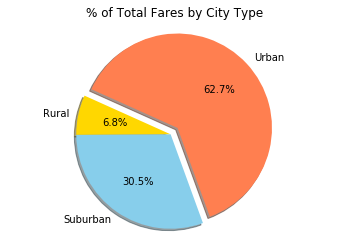

In [24]:
# Build Pie Chart

# Labels for the sections of the pie chart
labels2 = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes2 = [39854.38, 4327.93, 19356.33]

# The colors of each section of the pie chart
colors2 = ["Coral", "Gold", "SkyBlue"]

# Tells matplotlib to seperate the "Urban" section from the others
explode2 = (0.1, 0, 0)

# Creates the pie chart based upon the values above

plt.title("% of Total Fares by City Type")
plt.pie(sizes2, explode=explode2, labels=labels2, colors=colors2, autopct="%1.1f%%", shadow=True, startangle=290)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Fares.png")
plt.show()


## Total Rides by City Type

In [18]:
# Total Rides by City Type

count_ride = city_type['ride_id'].count()

count_ride

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

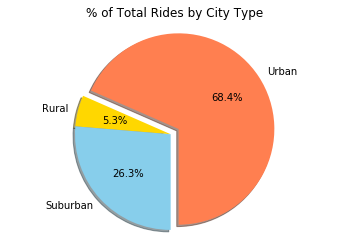

In [25]:
# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [1625, 125, 625]

# The colors of each section of the pie chart
colors = ["Coral", "Gold", "SkyBlue"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above

plt.title("% of Total Rides by City Type")
plt.pie(sizes, explode=[0.1,0,0], labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")

# Save Figure

plt.savefig("../Images/Rides.png")
plt.show()


## Total Drivers by City Type

In [20]:
# Total Drivers by City Type

# Group by type on city_data
city_type2 = city_data.groupby('type')
drivers = city_type2['driver_count'].sum()

drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

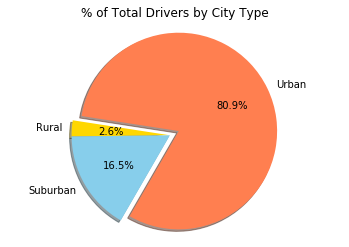

In [26]:
# Build Pie Chart

# Labels for the sections of our pie chart
labels3 = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes3 = [2405, 78, 490]

#sizes3 = drivers.tolist()
# The colors of each section of the pie chart
colors3 = ["Coral", "Gold", "SkyBlue"]

# Tells matplotlib to seperate the "Urban" section from the others
explode3 = (0.1, 0, 0)

# Creates the pie chart based upon the values above

plt.title("% of Total Drivers by City Type")
plt.pie(sizes3, explode=explode3, labels=labels3, colors=colors3, autopct="%1.1f%%", shadow=True, startangle=240)
plt.axis("equal")

# Save Figure

plt.savefig("../Images/Drivers.png")
plt.show()
